In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [3]:
def ec_mov(x_p,t,a=0):
    #x_p representa x,y,px,py
    r3_2 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    desv = 1.+a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = - (x_p[0]*desv)/r3_2
    dpy = -(x_p[1]*desv)/r3_2
    return array([dx,dy,dpx,dpy])

In [158]:
def energia(x_p,a):
    x,y,px,py =x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = (0.5)*((px**2)*(1+a) + py**2) - ((1+a)/sqrt(x**2 + y**2))
    return E
def Lz(x_p):
    x,y,px,py =x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py-y*px
    return L
    

In [174]:
t,sol = rk4(ec_mov,[1,0,0,0.5],[0,30],alfa,0.0001)

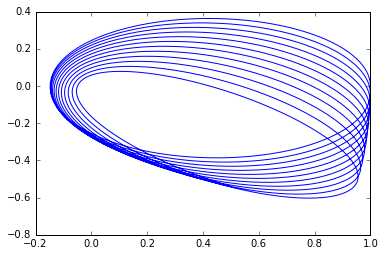

In [5]:
plot(sol[:,0],sol[:,1])
show()

In [224]:
alfa=0.02

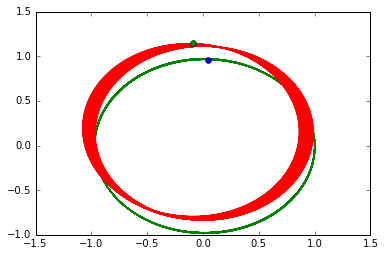

In [225]:
t = linspace(0,2*pi*50,5000)
sol1 = odeint(ec_mov,[1,0,0,1],t,(alfa,),rtol=1e-15)
sol2 = odeint(ec_mov,[0.99,sqrt(1-0.99**2),0,1],t,(alfa,),rtol=1e-15)
plot(sol1[:,0],sol1[:,1],color="g")
plot(sol1[-1,0],sol1[-1,1],"o")
plot(sol2[:,0],sol2[:,1],color="r")
plot(sol2[-1,0],sol2[-1,1],"o")

show()

In [226]:
E1 = energia(sol1,alfa)
L1 = Lz(sol1)
E2 = energia(sol2,alfa)
L2 = Lz(sol2)

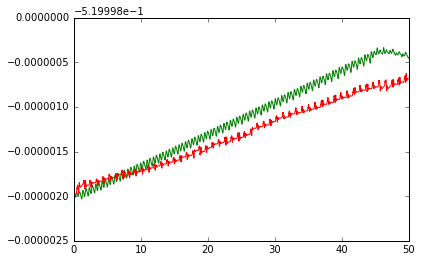

In [227]:
plot(t/(2*pi),E1,color="g")
plot(t/(2*pi),E2,color="r")
#ylim(E[0]-.0001,E[0]+.0001)
show()

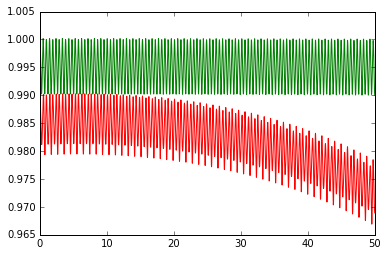

In [231]:
plot(t/(2*pi),L1,color = "g")
plot(t/(2*pi),L2,color = "r")
#ylim(L[0]-.0001,L[0]+.0001)
show()